In this notebook, we propose a demonstartion of bulk RNA-seq to single cell RNA-seq analysis in omicverse. We apply our implementation as well as the original code on the bulk data of Alzheimer's disease.

# bulk2single

## Setting up data

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import Pyomic
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

2023-05-12 15:57:28.413807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 15:57:28.491561: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-12 15:57:28.491579: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-12 15:57:28.988845: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

/mnt/data/env/pyomic/lib/python3.8/site-packages/phate/__init__.py


## Setting up with data

In [70]:
bulk_data=pd.read_csv('bulk_data_ad_norm_expr.csv',index_col=0)
bulk_data.head()

,Sample-1,Sample-10,Sample-100,Sample-101,Sample-11,Sample-12,Sample-13,Sample-14,Sample-16,Sample-17,...,Sample-89,Sample-90,Sample-91,Sample-92,Sample-93,Sample-94,Sample-95,Sample-97,Sample-98,Sample-99
ENSG00000000003,7.316251,6.808974,6.552535,7.073471,6.758017,7.669846,7.123949,6.989149,6.233648,6.756160,...,6.663440,7.286404,6.617804,7.003881,6.402691,6.617309,6.685133,6.549773,7.383512,7.009330
ENSG00000000419,4.274548,5.260135,4.804724,5.457774,4.729599,4.536239,4.951998,5.290385,5.356054,5.029578,...,4.846844,5.005343,5.143974,5.044753,4.540195,5.410444,5.137570,4.078207,4.995734,4.808391
ENSG00000000457,7.262058,7.115016,6.923650,7.012125,6.839936,7.111031,6.605485,6.464725,6.592650,6.648884,...,6.582624,7.158768,6.936302,6.769356,7.218603,7.465138,7.062497,6.523583,7.234697,6.877252
ENSG00000000460,6.663354,7.203029,6.245148,7.053250,7.046774,7.117171,6.422297,6.195208,6.363538,5.993144,...,6.673988,6.386566,6.549936,7.135192,6.661288,6.532775,7.026962,6.656357,6.449849,6.547121
ENSG00000000938,5.221161,4.165419,5.204919,4.402102,4.155380,5.237263,5.821118,4.838647,4.753822,6.175228,...,5.655549,4.646411,5.905709,5.320556,4.184051,4.931407,4.168826,4.874788,3.617607,4.076466


In [71]:
bulk_meta=pd.read_csv('bulk_data_ad_meta.csv',index_col=1)
bulk_meta.head()

,Unnamed: 0,RNAIsolation.Group,Dissection.Group,Sample.ID,Case.Year,Case.Num,Region,Neuropath.Dx.1,Neuropath.Dx.2,Age,...,MEDIAN_5PRIME_TO_3PRIME_BIAS,TOTAL_CLUSTERS,ALIGNED_READS,AT_DROPOUT,GC_DROPOUT,Seq.PC1,Seq.PC2,Seq.PC3,Seq.PC4,Seq.PC5
SampleID,,,,,,,,,,,,,,,,,,,,,
Sample-1,1,Group16,Group7,1,2000,8,FC,Alzheimer's disease,Unused,82,...,0.870195,42669514,65203198,20.803772,0.163871,-0.133179,-0.103026,0.412722,0.423658,-0.529204
Sample-10,2,Group13,Group13,10,2002,4,FC,Alzheimer's disease,Unused,83,...,0.543860,26814831,46094008,3.724324,3.087543,0.027563,0.108425,-0.009570,0.085121,0.056185
Sample-100,3,Group5,Group17,100,1999,26,FC,Normal (Mild Braak Changes),Unused,79,...,0.567146,32645219,59133696,7.030072,1.990039,-0.064691,-0.033957,-0.093489,0.026464,-0.033087
Sample-101,4,Group8,Group6,101,1999,37,FC,Normal (Mild Braak Changes),Unused,74,...,0.737687,24149702,44736556,11.776616,1.562165,0.051882,-0.150986,-0.042881,-0.068372,-0.000339
Sample-11,13,Group2,Group17,11,2002,16,FC,Alzheimer's disease,Unused,90,...,0.455994,26803406,50174354,3.197977,3.365408,0.008923,0.018487,-0.126085,-0.020246,-0.061431


In [72]:
import anndata
bulk_adata=anndata.AnnData(bulk_data.T)
bulk_adata.obs=bulk_meta.loc[bulk_adata.obs.index]
bulk_adata

AnnData object with n_obs × n_vars = 90 × 18849
    obs: 'Unnamed: 0', 'RNAIsolation.Group', 'Dissection.Group', 'Sample.ID', 'Case.Year', 'Case.Num', 'Region', 'Neuropath.Dx.1', 'Neuropath.Dx.2', 'Age', 'Sex', 'PMI', 'APoE', 'Clinical.Syndrome', 'Tangle.Stage', 'Plaque.Stage', 'Diagnosis', 'Plaques.Tangles', 'Braak...Braak.Stage', 'Dissection.By', 'RNA.Isolation.By', 'RIN', 'Library.Group', 'Sequencing.Group', 'TOTAL_READS', 'PF_READS', 'PF_READS_ALIGNED', 'PCT_PF_READS_ALIGNED', 'PF_ALIGNED_BASES', 'PF_HQ_ALIGNED_READS', 'PF_HQ_ALIGNED_BASES', 'PF_HQ_ALIGNED_Q20_BASES', 'PF_MISMATCH_RATE', 'PF_HQ_ERROR_RATE', 'PF_INDEL_RATE', 'READS_ALIGNED_IN_PAIRS', 'STRAND_BALANCE', 'PCT_CHIMERAS', 'PCT_ADAPTER', 'UNPAIRED_READS_EXAMINED', 'UNMAPPED_READS', 'READ_PAIR_DUPLICATES', 'READ_PAIR_OPTICAL_DUPLICATES', 'PERCENT_DUPLICATION', 'ESTIMATED_LIBRARY_SIZE', 'PF_BASES', 'PF_ALIGNED_BASES.1', 'RIBOSOMAL_BASES', 'CODING_BASES', 'UTR_BASES', 'INTRONIC_BASES', 'INTERGENIC_BASES', 'CORRECT_STRAND_REA

In [73]:
pair=pd.read_csv('pair_GRCh38.tsv',sep='\t',index_col=0)
pair.head()

,symbol
gene_id,
ENSG00000186827,TNFRSF4
ENSG00000186891,TNFRSF18
ENSG00000160072,ATAD3B
ENSG00000260179,NaN
ENSG00000234396,NaN


In [75]:
pair=pair.dropna()

In [76]:
ret_gene=list(set(bulk_adata.var.index) & set(pair.index))

In [77]:
bulk_adata=bulk_adata[:,ret_gene]

In [78]:
bulk_adata.var=pair.loc[bulk_adata.var.index]

In [79]:
bulk_adata.var['gene_id']=bulk_adata.var.index.tolist()
bulk_adata.var.head()

,symbol,gene_id
ENSG00000159409,CELF3,ENSG00000159409
ENSG00000143297,FCRL5,ENSG00000143297
ENSG00000239570,SETP11,ENSG00000239570
ENSG00000143515,ATP8B2,ENSG00000143515
ENSG00000130202,NECTIN2,ENSG00000130202


The `GSE174367_snRNA-seq_filtered_feature_bc_matrix.h5` and `GSE174367_snRNA-seq_cell_meta.csv` can be downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE174367

In [25]:
single_adata=sc.read_10x_h5('GSE174367_snRNA-seq_filtered_feature_bc_matrix.h5')
single_adata

reading GSE174367_snRNA-seq_filtered_feature_bc_matrix.h5
 (0:00:04)


AnnData object with n_obs × n_vars = 61770 × 58721
    var: 'gene_ids', 'feature_types', 'genome'

In [27]:
single_meta=pd.read_csv('GSE174367_snRNA-seq_cell_meta.csv',index_col=0)
single_meta.head()

,SampleID,Diagnosis,Batch,Cell.Type,cluster,Age,Sex,PMI,Tangle.Stage,Plaque.Stage,RIN
Barcode,,,,,,,,,,,
AAACCCAAGAAGCTCG-1,Sample-19,AD,3,ODC,ODC9,90,F,4.42,Stage 6,Stage C,6.8
AAACCCAAGGATGCGT-1,Sample-19,AD,3,ODC,ODC7,90,F,4.42,Stage 6,Stage C,6.8
AAACGAAGTTCGAAGG-1,Sample-19,AD,3,ODC,ODC1,90,F,4.42,Stage 6,Stage C,6.8
AAAGAACGTATTCCGA-1,Sample-19,AD,3,ODC,ODC2,90,F,4.42,Stage 6,Stage C,6.8
AAAGGATAGGCCTAAG-1,Sample-19,AD,3,ODC,ODC9,90,F,4.42,Stage 6,Stage C,6.8


In [30]:
ret_obs=list(set(single_adata.obs.index) & set(single_meta.index))

In [31]:
single_adata=single_adata[ret_obs]
single_adata

View of AnnData object with n_obs × n_vars = 61472 × 58721
    var: 'gene_ids', 'feature_types', 'genome'

In [33]:
single_adata.obs=single_meta.loc[single_adata.obs.index]

In [81]:
bulk_adata.var.index=bulk_adata.var['symbol']

In [82]:
index=bulk_adata.var.index
bulk_adata=bulk_adata[:,~index.duplicated(keep='first')]

In [83]:
bulk_adata.var['symbol']=bulk_adata.var['symbol'].astype(str)

In [85]:
bulk_adata.write_h5ad('bulk_adata.h5ad',compression='gzip')

In [86]:
single_adata.write_h5ad('single_adata.h5ad',compression='gzip')

## bulk2single in Alzheimer's disease

In [302]:
bulk_adata=sc.read('bulk_adata.h5ad')
single_adata=sc.read('single_adata.h5ad')

In [171]:
ret_sample=list(set(single_adata.obs['SampleID'].tolist()) & set(bulk_adata.obs.index.tolist()))
ret_sample[:5]

['Sample-100', 'Sample-66', 'Sample-33', 'Sample-58', 'Sample-50']

In [165]:
import scanpy as sc
sc.pp.normalize_total(bulk_adata, target_sum=1e4)
sc.pp.log1p(bulk_adata)

normalizing counts per cell
    finished (0:00:00)


In [167]:
sc.pp.scale(bulk_adata, max_value=10)

In [303]:
bulk_adata.var_names_make_unique()

In [6]:
single_adata[single_adata.obs['SampleID']=='Sample-43'].obs

,SampleID,Diagnosis,Batch,Cell.Type,cluster,Age,Sex,PMI,Tangle.Stage,Plaque.Stage,RIN
ACGTACAAGCCGTCGT-2,Sample-43,AD,1,OPC,OPC2,90,F,4.17,Stage 6,Stage B,8.9
TCTGCCACAGTATACC-2,Sample-43,AD,1,ASC,ASC1,90,F,4.17,Stage 6,Stage B,8.9
TGCTGAAGTTACTCAG-2,Sample-43,AD,1,MG,MG1,90,F,4.17,Stage 6,Stage B,8.9
GATCCCTCAGCGAACA-2,Sample-43,AD,1,INH,INH1,90,F,4.17,Stage 6,Stage B,8.9
CACCGTTCACTCACTC-2,Sample-43,AD,1,ASC,ASC1,90,F,4.17,Stage 6,Stage B,8.9
...,...,...,...,...,...,...,...,...,...,...,...
ACATGCATCGTCGATA-2,Sample-43,AD,1,ODC,ODC8,90,F,4.17,Stage 6,Stage B,8.9
GTGTGATTCCAGCACG-2,Sample-43,AD,1,ODC,ODC2,90,F,4.17,Stage 6,Stage B,8.9
GCTACAAAGCATCCTA-2,Sample-43,AD,1,ODC,ODC8,90,F,4.17,Stage 6,Stage B,8.9
CATCCGTCACGCCAGT-2,Sample-43,AD,1,INH,INH3,90,F,4.17,Stage 6,Stage B,8.9


In [304]:
bulkdata=bulk_adata['Sample-43'].to_df().T
bulkdata

,Sample-43
symbol,
CELF3,6.016847
FCRL5,7.622078
SETP11,5.666948
ATP8B2,8.309679
NECTIN2,7.510575
...,...
SLC6A4,5.397901
SLC29A4,8.198331
CDAN1,7.927313


In [176]:
bulkdata=np.exp(bulkdata)

In [159]:
bulk_adata['Sample-100'].to_df().iloc[:,:100]

symbol,CELF3,FCRL5,SETP11,ATP8B2,NECTIN2,ANAPC1P4,STX6,PFKM,PGLS,ANKZF1,...,SPIN3,MCPH1-DT,SCARNA9,CD86,ZNF23,NUDT19,NMNAT2,CPEB4,ZNF260,CCDC90B-AS1
Sample-100,5.918649,7.766842,4.894407,8.232009,8.040775,3.334287,9.472297,8.304775,6.442626,8.94476,...,7.270571,5.990289,7.375604,3.318664,7.265685,5.153637,8.8668,10.68626,8.464908,8.069125


(array([1.5023e+04, 1.3050e+03, 1.2700e+02, 3.7000e+01, 6.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.03645696,  2.8725274 ,  5.7085977 ,  8.544668  , 11.380739  ,
        14.216809  , 17.05288   , 19.88895   , 22.725021  , 25.56109   ,
        28.397161  ], dtype=float32),
 <BarContainer object of 10 artists>)

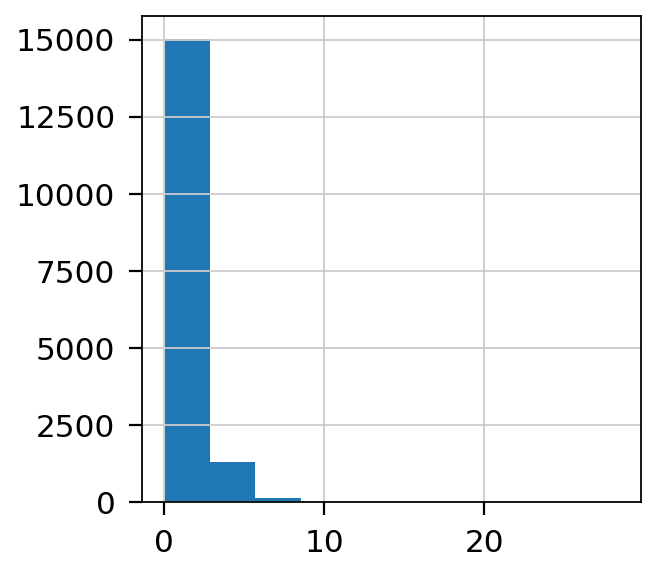

In [253]:
plt.hist(bulkdata)

(array([3.855e+03, 6.640e+02, 2.400e+02, 1.230e+02, 5.800e+01, 3.400e+01,
        1.300e+01, 9.000e+00, 3.000e+00, 1.000e+00]),
 array([0.01023392, 0.3991089 , 0.78798383, 1.1768588 , 1.5657338 ,
        1.9546087 , 2.3434837 , 2.7323587 , 3.1212335 , 3.5101085 ,
        3.8989835 ], dtype=float32),
 <BarContainer object of 10 artists>)

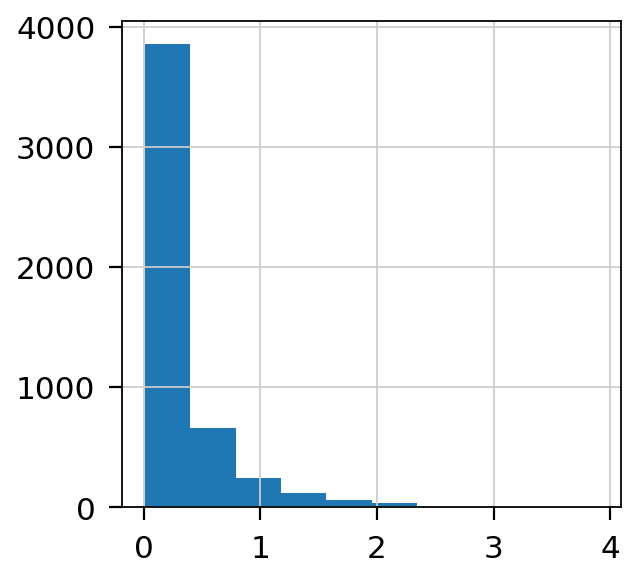

In [154]:
plt.hist(singledata.X.toarray().mean(axis=1).reshape(-1))

In [292]:
singledata=single_adata[((single_adata.obs['Diagnosis']=='AD') & (single_adata.obs['SampleID']!='Sample-43'))]
singledata

View of AnnData object with n_obs × n_vars = 33841 × 58721
    obs: 'SampleID', 'Diagnosis', 'Batch', 'Cell.Type', 'cluster', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'RIN'
    var: 'gene_ids', 'feature_types', 'genome'

In [293]:
import random
random_obs_index=random.sample(list(singledata.obs.index),5000)

In [294]:
singledata=singledata[random_obs_index]

In [295]:
singledata.X.max()

4534.0

In [296]:
#过滤细胞
adata=singledata
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.external.pp.scrublet(adata) #estimates doublets
adata = adata[adata.obs['predicted_doublet'] == False] #do the actual filtering


filtered out 30063 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 24.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.2%
    Scrublet finished (0:00:07)


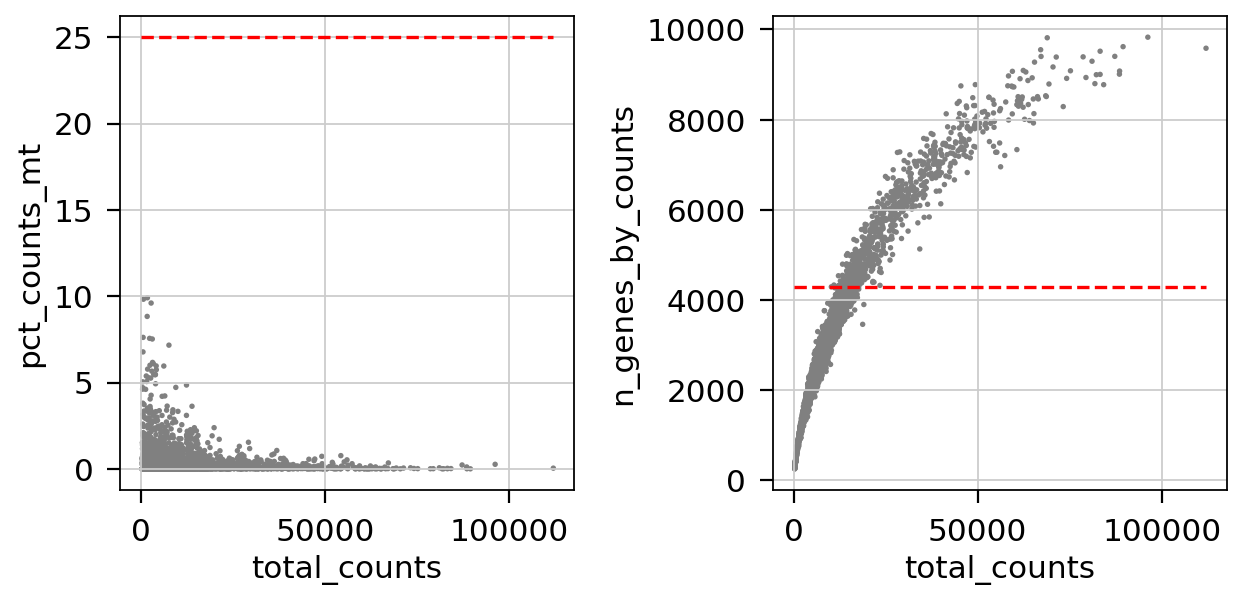

In [297]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
import matplotlib.pyplot as plt
mito_filter = 25
n_counts_filter = 4300
fig, axs = plt.subplots(ncols = 2, figsize = (8,4))
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', ax = axs[0], show=False)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', ax = axs[1], show = False)
#draw horizontal red lines indicating thresholds.
axs[0].hlines(y = mito_filter, xmin = 0, xmax = max(adata.obs['total_counts']), color = 'red', ls = 'dashed')
axs[1].hlines(y = n_counts_filter, xmin = 0, xmax = max(adata.obs['total_counts']), color = 'red', ls = 'dashed')
fig.tight_layout()
plt.show()

In [298]:
adata = adata[adata.obs.n_genes_by_counts < 4300, :]
adata = adata[adata.obs.pct_counts_mt < 25, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [299]:
adata.var_names_make_unique()

In [305]:
model=Pyomic.bulk2single.Bulk2Single(bulk_data=bulkdata,single_data=adata,celltype_key='Cell.Type',
                 top_marker_num=200,ratio_num=1,gpu=0)

...loading data
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


In [319]:
model.cell_target_num

{'ASC': 672.0,
 'EX': 663.0,
 'INH': 85.0,
 'MG': 634.0,
 'ODC': 587.0,
 'OPC': 394.0,
 'PER.END': 1145.0}

In [269]:
model.cell_target_num=dict(adata.obs['Cell.Type'].value_counts())

In [308]:
vae_net=model.train(
    batch_size=512,
    learning_rate=1e-4,
    hidden_size=256,
    epoch_num=3500,
    vae_save_dir='newdata/save_model',
    vae_save_name='ad_vae',
    generate_save_dir='newdata/output',
    generate_save_name='ad')

...begin vae training


Train Epoch: 2275:  65%|▋| 2276/3500 [12:59<06:59,  2.92it/s, loss=0.9698

Early stopping at epoch 2277...
min loss = 0.9683483839035034
...vae training done!


...save trained vae in newdata/save_model/ad_vae.pth.


In [321]:
generate_adata=model.generate()
generate_adata

...generating


generating: 100%|███████████████| 4180/4180.0 [00:00<00:00, 11398.80it/s]


generated done!


AnnData object with n_obs × n_vars = 4180 × 14730
    obs: 'Cell.Type'

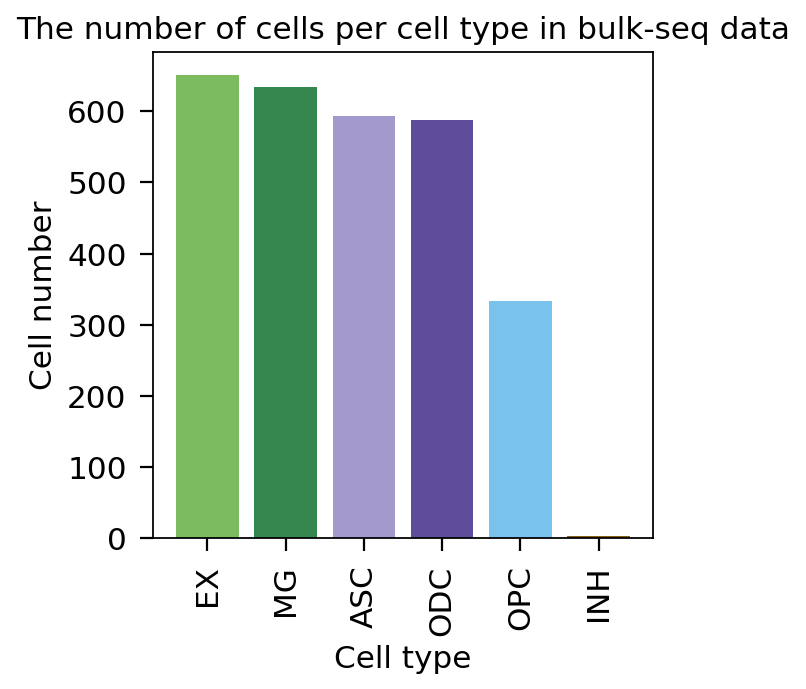

In [318]:
Pyomic.bulk2single.bulk2single_plot_cellprop(generate_adata,celltype_key='Cell.Type')
plt.grid(False)

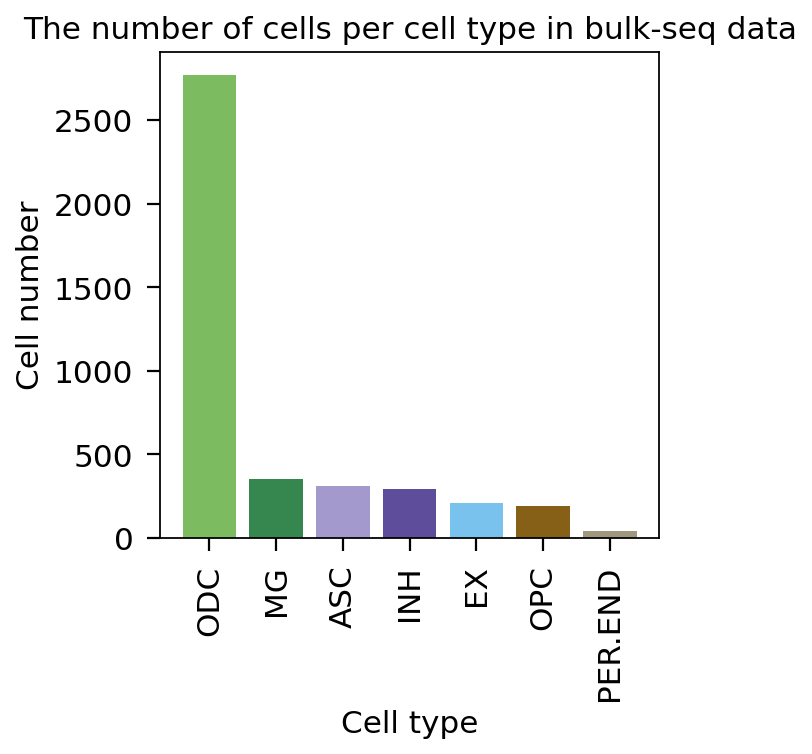

In [317]:
Pyomic.bulk2single.bulk2single_plot_cellprop(adata,celltype_key='Cell.Type')
plt.grid(False)

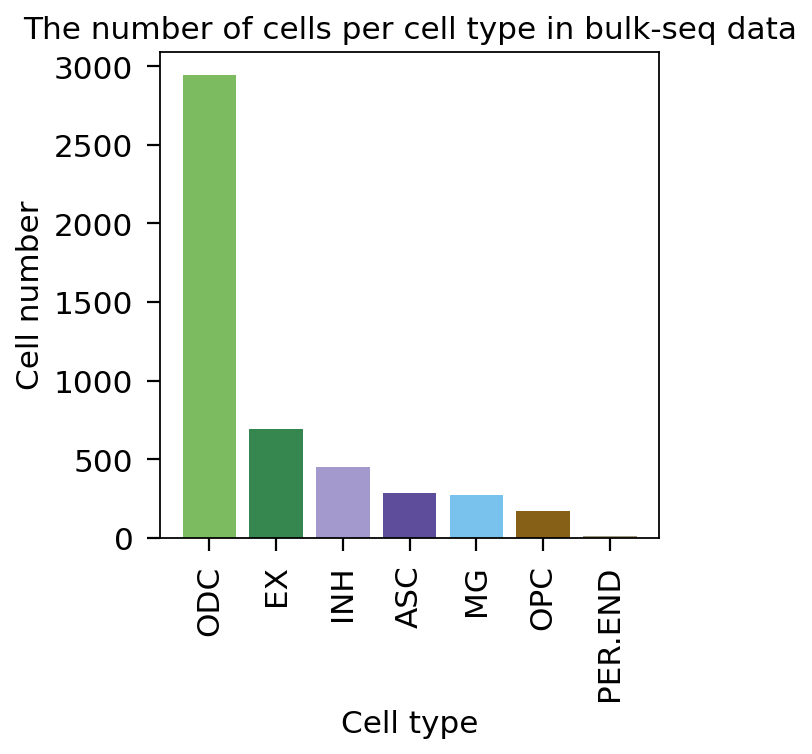

In [290]:
Pyomic.bulk2single.bulk2single_plot_cellprop(single_adata[single_adata.obs['SampleID']=='Sample-43'],celltype_key='Cell.Type')
plt.grid(False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


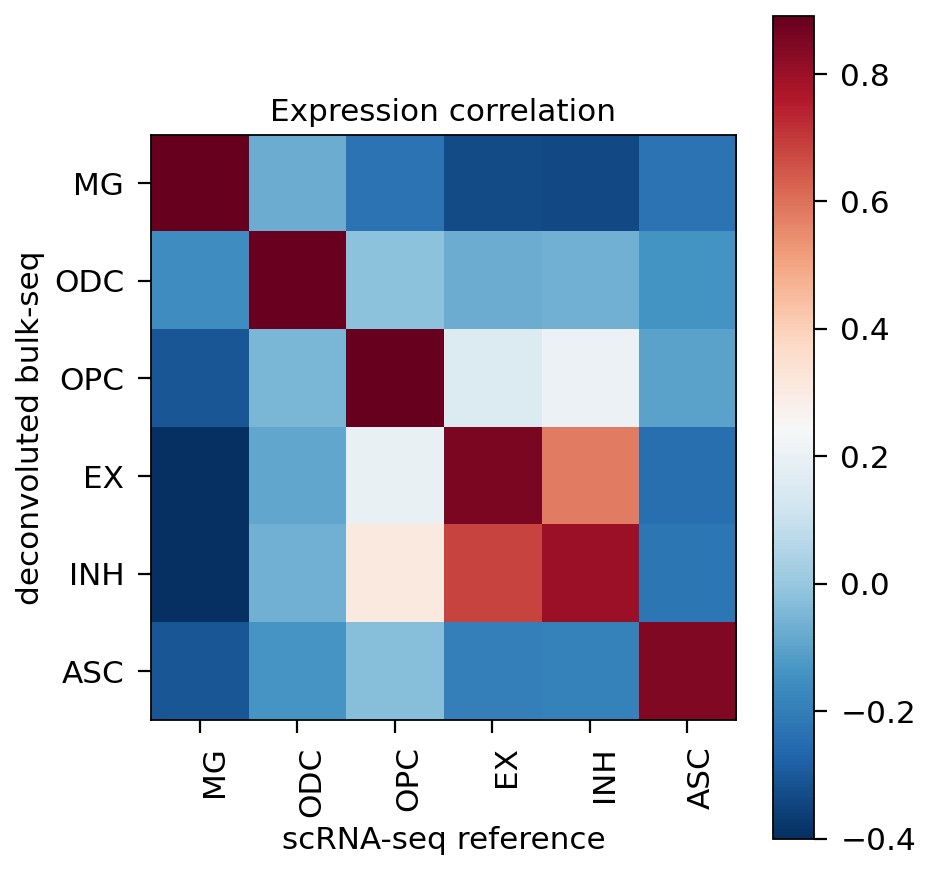

In [334]:
Pyomic.bulk2single.bulk2single_plot_correlation(adata,generate_adata,celltype_key='Cell.Type')
plt.grid(False)

In [32]:
testadata=single_adata[single_adata.obs['SampleID']=='Sample-43']
testadata.var_names_make_unique()

In [34]:
sc.pp.normalize_total(testadata, target_sum=1e4)
sc.pp.log1p(testadata)

normalizing counts per cell
    finished (0:00:00)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


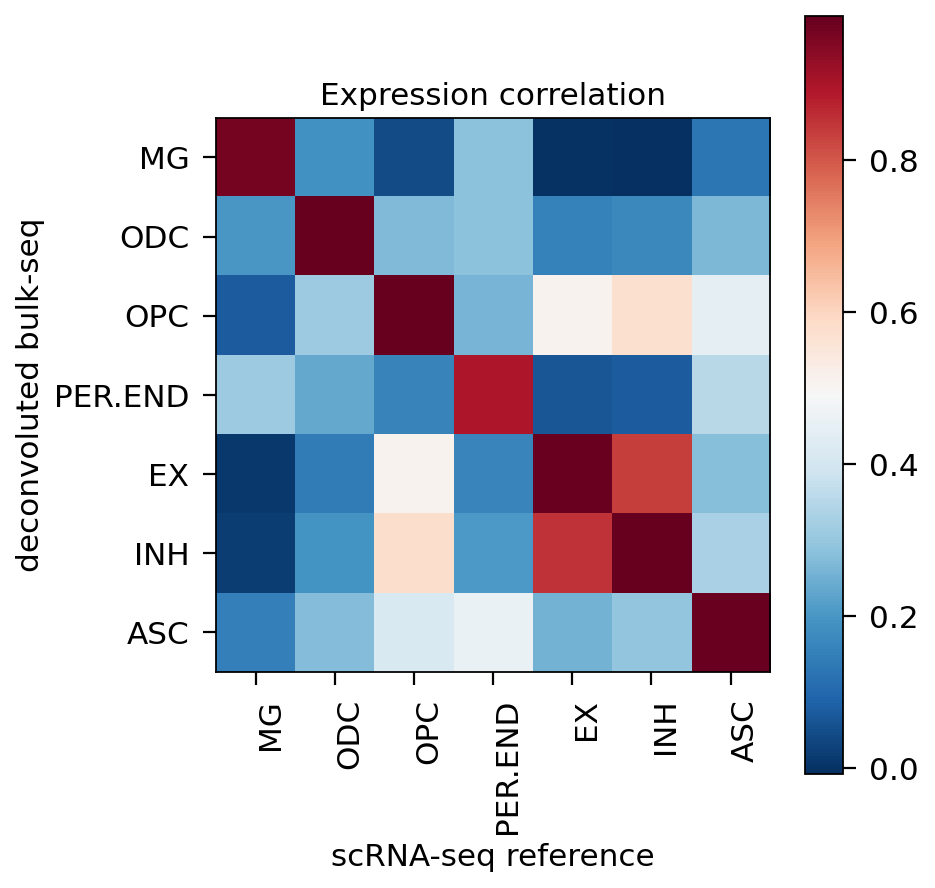

In [324]:
Pyomic.bulk2single.bulk2single_plot_correlation(testadata,adata,celltype_key='Cell.Type')
plt.grid(False) 

In [37]:
generate_adata.X.max()

7.7613916

In [325]:
generate_adata.raw = generate_adata
sc.pp.highly_variable_genes(generate_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
generate_adata = generate_adata[:, generate_adata.var.highly_variable]
sc.pp.scale(generate_adata, max_value=10)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [326]:
sc.tl.pca(generate_adata, n_comps=100, svd_solver="auto")

computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:02)


In [327]:
sc.pp.neighbors(generate_adata, use_rep="X_pca")
sc.tl.leiden(generate_adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 58 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [328]:
sc.tl.paga(generate_adata)
sc.pl.paga(generate_adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(generate_adata,init_pos='paga')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [331]:
generate_adata.obs['leiden'].value_counts()[generate_adata.obs['leiden'].value_counts()<50].index


CategoricalIndex(['13', '14', '21', '25', '24', '23', '22', '20', '18', '17',
                  '16', '15', '19', '42', '49', '44', '45', '46', '47', '48',
                  '52', '50', '51', '53', '54', '55', '56', '43', '29', '41',
                  '40', '39', '38', '37', '36', '35', '34', '33', '32', '31',
                  '30', '28', '27', '26', '57'],
                 categories=['0', '1', '2', '3', ..., '54', '55', '56', '57'], ordered=False, dtype='category')

In [332]:
generate_adata=generate_adata[~generate_adata.obs['leiden'].isin(generate_adata.obs['leiden'].value_counts()[generate_adata.obs['leiden'].value_counts()<50].index)]
generate_adata

View of AnnData object with n_obs × n_vars = 2943 × 2772
    obs: 'Cell.Type', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

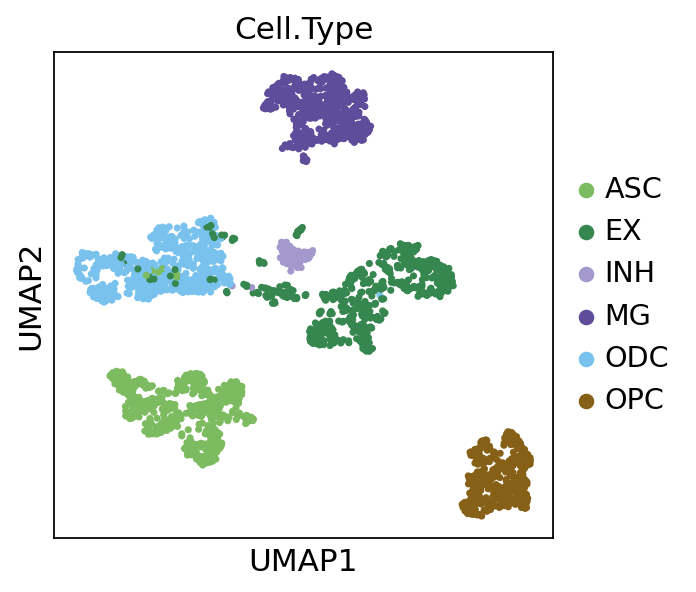

In [336]:
import scanpy as sc
sc.pl.umap(generate_adata,color=['Cell.Type'],wspace=0.4,
          palette=Pyomic.utils.pyomic_palette())

In [340]:
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [341]:
sc.tl.pca(adata, n_comps=100, svd_solver="auto")
sc.pp.neighbors(adata, use_rep="X_pca")
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata,init_pos='paga')

computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=100
    finished (0:00:02)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [345]:
adata.obs['leiden'].value_counts()[adata.obs['leiden'].value_counts()<100].index
adata=adata[~adata.obs['leiden'].isin(adata.obs['leiden'].value_counts()[adata.obs['leiden'].value_counts()<100].index)]
adata

View of AnnData object with n_obs × n_vars = 4072 × 5663
    obs: 'SampleID', 'Diagnosis', 'Batch', 'Cell.Type', 'cluster', 'Age', 'Sex', 'PMI', 'Tangle.Stage', 'Plaque.Stage', 'RIN', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'scrublet', 'log1p', 'rank_genes_groups', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap', 'Cell.Type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

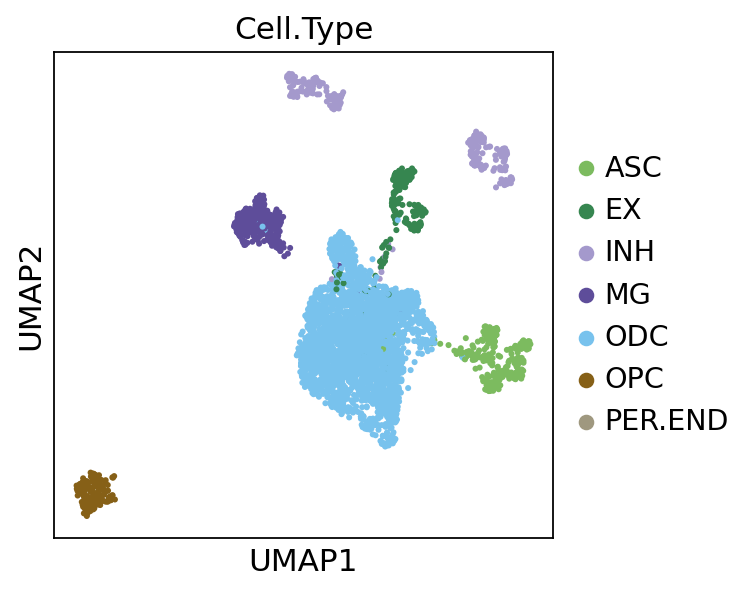

In [346]:
import scanpy as sc
sc.pl.umap(adata,color=['Cell.Type'],wspace=0.4,
          palette=Pyomic.utils.pyomic_palette())

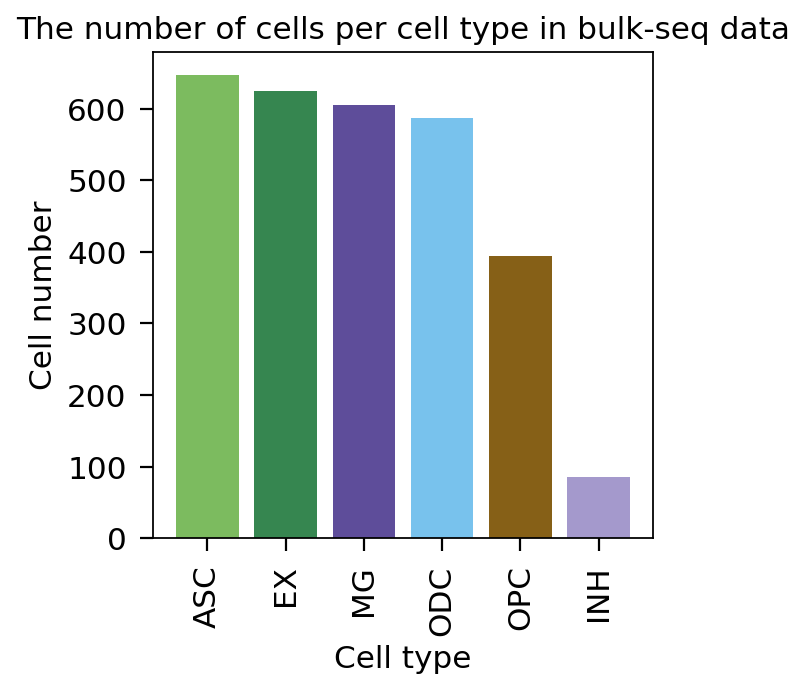

In [338]:
def bulk2single_plot_cellprop(generate_single_data:anndata.AnnData,
                              celltype_key:str,figsize:tuple=(4,4))->Tuple[matplotlib.figure.Figure,matplotlib.axes._axes.Axes]:
    r"""
    cellprop plot for bulk2single analysis.

    Arguments:
        generate_single_data: The single cell data generated by bulk2single analysis.
        celltype_key: The key of cell type in single cell data.
        figsize: The size of figure. (default: (4,4))

    Returns:
        fig: The figure of the cell proportion
        ax: The axes of the figure.
    """
    ct_stat = pd.DataFrame(generate_single_data.obs[celltype_key].value_counts())
    generate_single_data.obs[celltype_key]=generate_single_data.obs[celltype_key].astype('category')
    key_name=list(generate_single_data.obs[celltype_key].cat.categories)
    ct_name = list(ct_stat.index)
    ct_num = list(ct_stat[celltype_key])
    if '{}_colors'.format(celltype_key) in generate_single_data.uns.keys():
        color=generate_single_data.uns['{}_colors'.format(celltype_key)]
        color_dict=dict(zip(key_name,color))
        color=[color_dict[i] for i in ct_name]
    else:
        color = pyomic_palette()
    fig, ax = plt.subplots(figsize=figsize)
    plt.bar(ct_name, ct_num, color=color)
    plt.xticks(ct_name, ct_name, rotation=90)
    plt.title("The number of cells per cell type in bulk-seq data")
    plt.xlabel("Cell type")
    plt.ylabel("Cell number")
    return ax
bulk2single_plot_cellprop(generate_adata,celltype_key='Cell.Type')
plt.grid(False)

In [362]:
adata=adata[adata.obs['Cell.Type']!='PER.END']

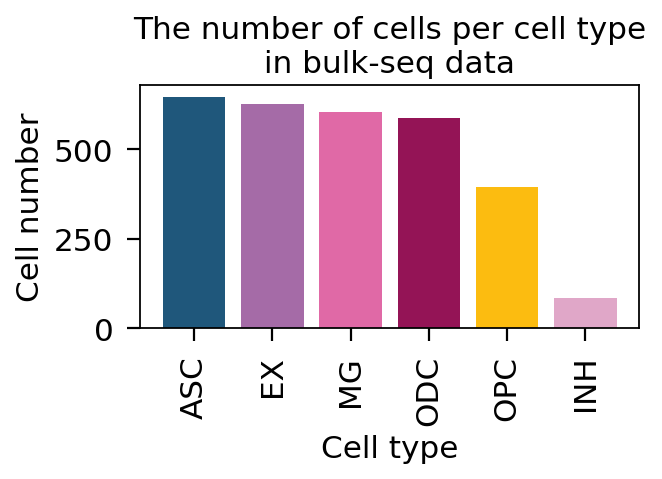

In [377]:
bulk2single_plot_cellprop(generate_adata,celltype_key='Cell.Type',figsize=(4,2))
plt.grid(False)
plt.title('The number of cells per cell type\nin bulk-seq data')
plt.savefig("figures/prop_generate.png",dpi=300,bbox_inches = 'tight')

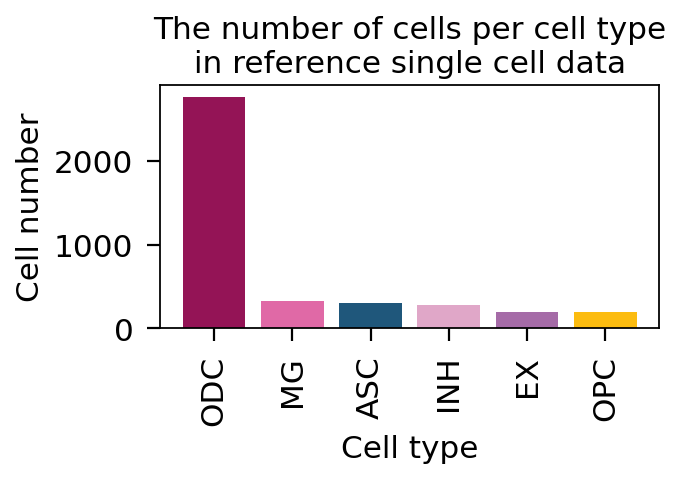

In [376]:
#fig, ax = plt.subplots(figsize=(4,4))
bulk2single_plot_cellprop(adata,celltype_key='Cell.Type',figsize=(4,2))
plt.grid(False)
plt.title('The number of cells per cell type\nin reference single cell data')
plt.savefig("figures/prop_refer.png",dpi=300,bbox_inches = 'tight')

In [348]:
from scvi.model.utils import mde
adata.obsm["X_mde"] = mde(adata.obsm["X_pca"])

In [349]:
from scvi.model.utils import mde
generate_adata.obsm["X_mde"] = mde(generate_adata.obsm["X_pca"])

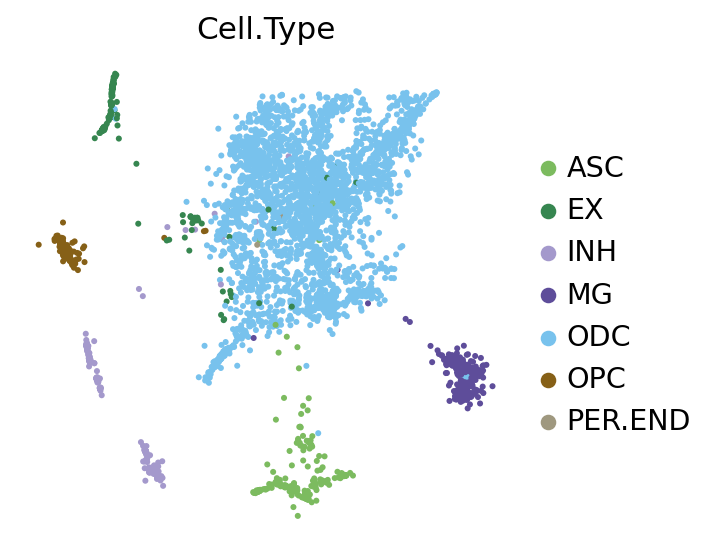

In [351]:
sc.pl.embedding(
    adata,
    basis="X_mde",
    color=['Cell.Type'],
    frameon=False,
    #ncols=1,
    wspace=0.65,
    palette=Pyomic.utils.pyomic_palette()
)

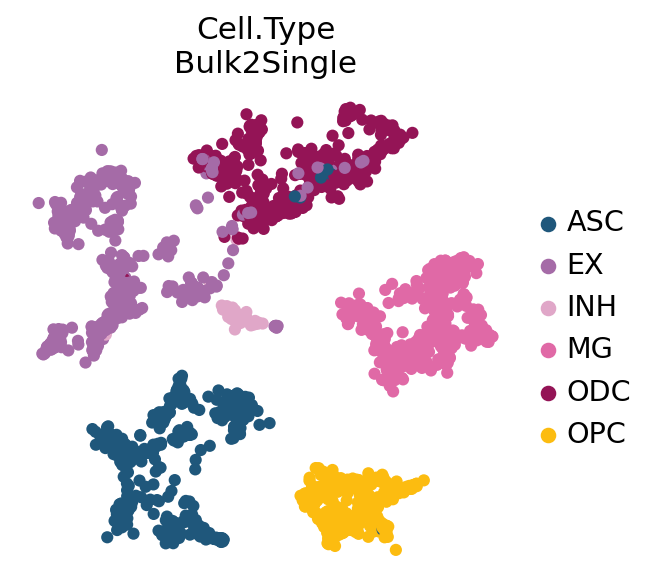

In [359]:
fig, ax = plt.subplots(figsize=(4,4))
sc.pl.embedding(
    generate_adata,
    basis="X_mde",
    color=['Cell.Type'],
    title='Cell.Type\nBulk2Single',
    frameon=False,
    #ncols=1,
    wspace=0.65,
    palette=Pyomic.utils.pyomic_palette()[11:],
    size=120,
    show=False,
    ax=ax
)
fig.savefig("figures/umap_celltype_bulk2single.png",dpi=300,bbox_inches = 'tight')

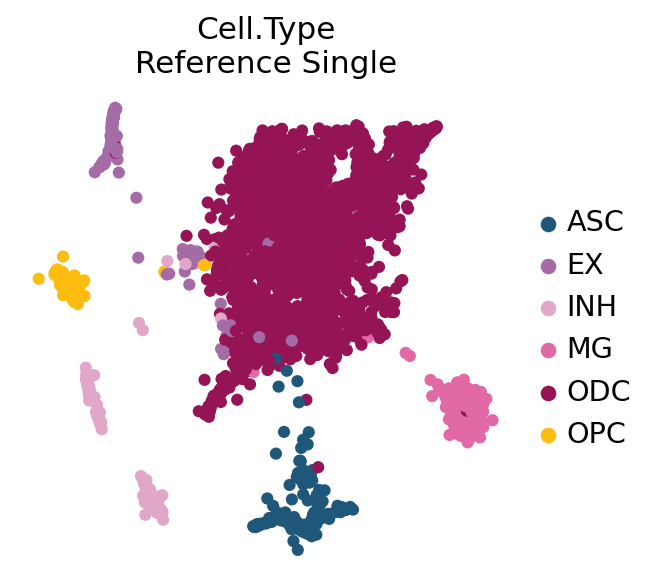

In [364]:
fig, ax = plt.subplots(figsize=(4,4))
sc.pl.embedding(
    adata,
    basis="X_mde",
    color=['Cell.Type'],
    title='Cell.Type\nReference Single',
    frameon=False,
    #ncols=1,
    wspace=0.65,
    palette=Pyomic.utils.pyomic_palette()[11:],
    size=120,
    show=False,
    ax=ax
)
fig.savefig("figures/umap_celltype_refer.png",dpi=300,bbox_inches = 'tight')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


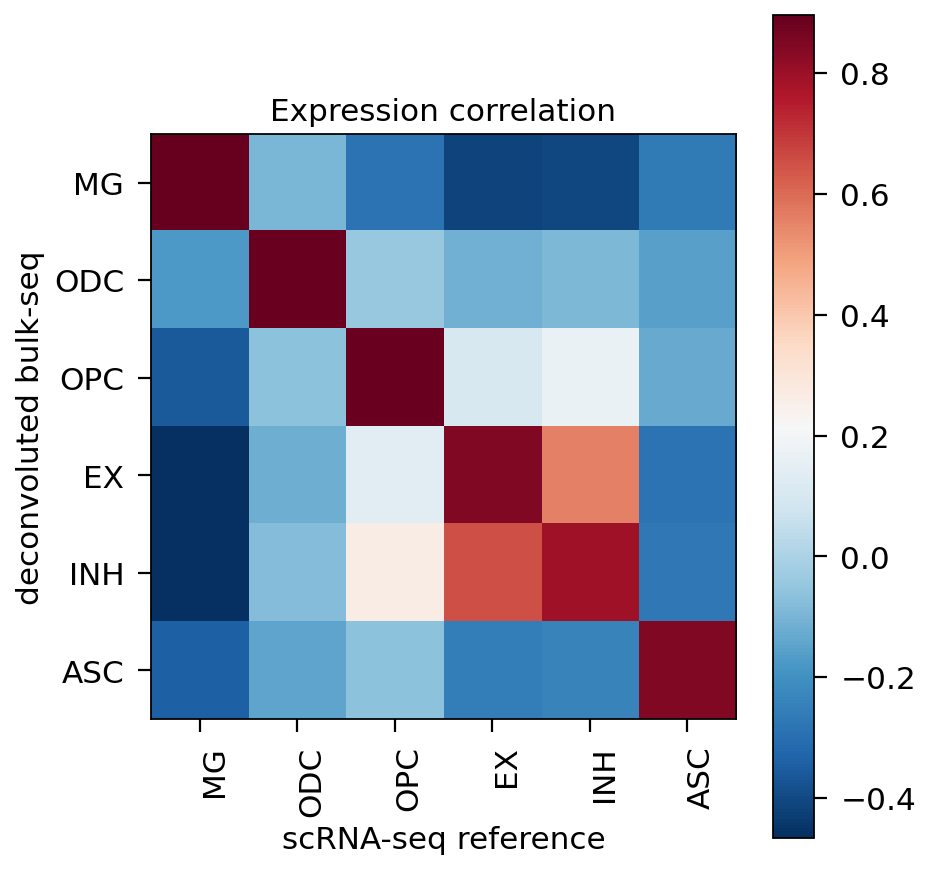

In [375]:
Pyomic.bulk2single.bulk2single_plot_correlation(adata.raw.to_adata(),generate_adata,celltype_key='Cell.Type')
plt.grid(False)
plt.savefig("figures/correlation_ad.png",dpi=300,bbox_inches = 'tight')